In [1]:
#  INSTALL DEPENDENCY AND LIBRARIES
# multiple output model
import os # os library help us to work with the different file faucets
import pandas as pd 
import tensorflow as tf
import numpy as np
# tensorflow and tensorflow-gpu  are going to be deep learning models - keras
#  will be used to create sequential model
#  -pandas will help in reading the tabular data 
#  matplotlib - helps for some plotting
#  sklearn
# numpy - numpy is used as np.expand_dims  --> wrap up any of the information inside
# the another set of array ---> used when we got one sample in our batch
# and we want to pass it through our deep learning models bcz we are expecting multiple examples
# in that particular batch so we normally wrap it up inside of that 


In [2]:
# Bringing our data 
df = pd.read_csv( # here we use pd.read_csv function to read the csv
    os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv')
#     os.path.join ---> gives us the full path to our dataset
)

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [5]:
df.iloc[6]['comment_text']
#  example of toxic comment 

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [6]:
df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

In [7]:
#  Preprocessing to get the data ready for modelling 
# -- Tokenization --->  translating sentence into tokens which only deep nueral network understands
#  -- unique identifier so each word maps out to a number 
# we will also create training testing and validation partition as well


In [8]:
from tensorflow.keras.layers import TextVectorization
# textvectorization is used for tokenization

In [9]:
X = df['comment_text']
y = df[df.columns[2:]].values
# .values convert it into numpy array


In [10]:
MAX_FEATURES = 200000 # number of words in the vocab

In [11]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
# output_sequence_length ---> maximum length of the sentence in our token 
# output_mode in the form of integer

In [12]:
vectorizer.adapt(X.values)
# adapt will help us to learn all the words in vocabulary 
# we use  X.values cuz we need numpy array instead of pandas series
# vectorizer.get_vocabulary()  ---> can also be used to get the vocabulary 

In [13]:
# vectorizer("Hello world, life is great")[:5]
#  removes the punctuation 

In [14]:
vectorized_text = vectorizer(X.values)
#  here we will pass all our x values through the vectorizer and we gonna get the vectorized_text data

In [15]:
vectorized_text
# numeric representation of all of our sentences 
#  if our sentence doesn't need max length then it fills the rest with zero

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2506, ...,     0,     0,     0],
       [  425,   440,    70, ...,     0,     0,     0],
       ...,
       [32141,  7329,   383, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [16]:
# MC SHBAP -- map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))  # we create our dataset
dataset = dataset.cache() # caches the data
dataset = dataset.shuffle(160000) # shuffles 
dataset = dataset.batch(16) #batches it up in series of 16 samples 
dataset = dataset.prefetch(8) # helps bottlenecks

#  we gonna create a tensorflow data pipeline 
# dataset.as_numpy_iterator().next()  ---> gets us the batch 

In [17]:
batch_X,batch_Y=dataset.as_numpy_iterator().next() 

In [18]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) # we are skipping 70 percent and grabbing 20 percent 
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1)) # we arre skipping 30 percent and grabbing 10 percent
# training , validation ,test partition 

In [19]:
train_generator = train.as_numpy_iterator()

In [20]:
train_generator.next() #here we could see all the iterators 

(array([[1417,   45,   35, ...,    0,    0,    0],
        [ 102, 1562,   72, ...,    0,    0,    0],
        [  86,  848,  178, ...,    0,    0,    0],
        ...,
        [   7,   69,   54, ...,    0,    0,    0],
        [4581,  350, 1049, ...,    0,    0,    0],
        [  32,    2,  108, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [21]:
# Building an deep learning model
#   ----> How do we actually take this words and give them to a deep learning model?
#     first layer -- embedding layer -->  embedding that maps to a word knows a lot about that word 

In [22]:
# create sequential model - gonna use sequential api 
# we could build this model through other ways also sequential model is the fastest and easiest 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding # bringing in a bunch of layers

In [24]:
# these are the layers which we are going to use to build a deep nueral network
# lstm layers are going to be our starting layers , bidirectioal layer is going to be our modifier on top of that and it's going to allow us to pass the features or values from our lstm outputs across the board as we're passing through our sequences
# Dropout is a method of regularisation & our dense layer is our fully connected layer and so we are going to again bring in sequential and bunch of layers down here
# we are going to pass through our sequences to our embedding that converts like the personality test per word and that is learned as we pass through our deep nueral network


In [25]:
model = Sequential()  # instantiate our model
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1,32)) # max- feature = number of words and +1 is done for unkown words which gonna have their own separate embedding
#  how many different types of embedding we gonna need 
# MAX_FEATURES+1 == how many words we gonna have & 32 == how many features we gonna have in our embedding 
#  one embedding per word --> our embedding is gonna be 32 values in length
# 200,001 different types of embedding  and there gonna be 32 values long
 
    

# Creating our lstm layer 
model.add(Bidirectional(LSTM(32,activation = 'tanh')))
# lstm layer is gonna have 32 different lstm units and specify the activation of tanh
# reason we are using tanh over relu bcz the gpu acceleration that is required for lstm layer needs to be tanh
# bi-directioanl allows you to pass the information backwards and forwards across the lstm layer 
# sequence ouputting information in one direction  but bi directional allow in two directions
# two direction in sentences is useful bcz words prior to current word will still have meaning might even modify a meaning 
# ex - i don't hate you --> if it one direction then hate will make it negative but with bi direction don't will also be remembered which will give it it's actual meaning 
# using biderecctional layer when it comes to nlp helps a lot
# attention or self attention helps with transformers and transform and make it easier to work with 


# Dense layers  --> three feature extractors 
# FEature extractor fully connected layers 
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

#Final layer
# maps to the number of different outputs that we have got inside of our neural network 
# y values we have 159571 samples with  6 different values or vectors
# by having 6 final units in our dense layer  we are gonna be output the exact same style of output as our labels
# sigmoid activation - it's gonna transform any given output that we gonna get from features layer into a value between 0 and 1 
# activation acts like a modifier and it allows us to  take non linerities into account when building a deep neural network
model.add(Dense(6,activation='sigmoid'))
# deep neural network created

In [26]:
model.compile(loss='BinaryCrossentropy', optimizer = 'Adam')
#compile the model
#   there are six lines coming out shouldn't this be categorical cross entropy ?
#    it's like we are running almost six binary classifier almost at same time 
#   we are having multi output model -->
# other optimizer like sjd can also be used 


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [28]:
history = model.fit(train,epochs=7,validation_data=val)
    # training the model 
    #epochs is how long you want to train the model
    

Epoch 1/7
6981/6981 [==============================] - 7097s 1s/step - loss: 0.0610 - val_loss: 0.0440
Epoch 2/7
6981/6981 [==============================] - 6523s 934ms/step - loss: 0.0451 - val_loss: 0.0396
Epoch 3/7
6981/6981 [==============================] - 6813s 976ms/step - loss: 0.0407 - val_loss: 0.0368
Epoch 4/7
6981/6981 [==============================] - 6403s 917ms/step - loss: 0.0357 - val_loss: 0.0329
Epoch 5/7
6981/6981 [==============================] - 5938s 851ms/step - loss: 0.0318 - val_loss: 0.0279
Epoch 6/7
6981/6981 [==============================] - 5818s 833ms/step - loss: 0.0290 - val_loss: 0.0258
Epoch 7/7
6981/6981 [==============================] - 6350s 910ms/step - loss: 0.0260 - val_loss: 0.0214


In [29]:
history.history

{'loss': [0.060975585132837296,
  0.04514980688691139,
  0.040744226425886154,
  0.035673242062330246,
  0.03180287405848503,
  0.029014231637120247,
  0.025992179289460182],
 'val_loss': [0.04399886354804039,
  0.03957647830247879,
  0.03680085390806198,
  0.032866720110177994,
  0.02786983922123909,
  0.025823917239904404,
  0.021403536200523376]}

In [30]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

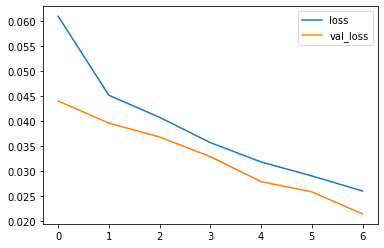

In [31]:
 plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [32]:
# Make predictions 
input_text = vectorizer('You freaking suck!, I  punch you')
# vectorized the text 

In [33]:
batch = test.as_numpy_iterator().next()

In [34]:
batch_X,batch_Y=test.as_numpy_iterator().next()

In [35]:
# model.predict(input_text)
#  it will fail cuz the  we have not passed it as a batch or series of values and its only single value
#  number of values in sequence * number of embedding  which will be input shape


In [36]:
# model.predict(np.array([input_text]))
#  by converting the input text into numpy array we could get it as prediction

In [37]:
# np.expand_dims(input_text,0)
#  it will do the same thing as np.array but it is little bit cleaner

In [38]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [39]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 3s 3s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]])

In [40]:
batch_Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0]], dtype=int64)

In [41]:
#  Evaluation -- > Precision Recall Categorical Accuracy


In [42]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [43]:
pre= Precision()
re= Recall()
acc= CategoricalAccuracy()

In [44]:
for batch in test.as_numpy_iterator():   # iterate through every single batch in our data pipeline
    #Unpack the batch
    X_true, y_true = batch
    #Make a prediction
    yhat = model.predict(X_true)
    
    #Flatten the predictions - making them in one single big array instead of 2d
    y_true = y_true.flatten()
    yhat=yhat.flatten()
    
    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)
    
    

1/1 [==============================] - 0s 296ms/step


1/1 [==============================] - 0s 248ms/step


1/1 [==============================] - 0s 256ms/step


1/1 [==============================] - 0s 248ms/step


In [45]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.8936361074447632, Recall:0.8901785612106323, Accuracy:0.5366098284721375


In [46]:
!pip install gradio jinja2

  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=0225216b86847fcfc8135bbbacf73f052f4d7e5065ed10533a243fa920ac1edc
  Stored in directory: c:\users\saransh\appdata\local\pip\cache\wheels\91\e2\96\f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=ad3d2abe49caf4aa8f3964509370384cd398f49c701789e093b517ac482135d6
  Stored in directory: c:\users\saransh\appdata\local\pip\cache\wheels\fe\04\d1\a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built ffmpy python-multipart
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: anyio
    Found existing installation: anyio 2.2.0
    Uninstalling anyio-2.2.0:
      Successfully uninstalled anyio-2.2.0


In [51]:
import tensorflow as tf
import gradio as gr

ImportError: cannot import name dataclass_transform

In [48]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')